# TinyML - Huber Regression

#### Federal University of Rio Grande do Norte

#### Name: Thommas Kevin Sales Flores

## 0. Install the libraries listed in the requirements.txt file

In [1]:
#!pip install -r requirements.txt

## 1. Importing libraries

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_poisson_deviance,
    mean_squared_error,
)

import m2cgen as m2c
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## 2. Load Dataset

The "Vehicle Attributes and Emissions Dataset" contains comprehensive information on various vehicles manufactured in the year 2000. It includes details such as make, model, vehicle class, engine size, cylinder count, transmission type, and fuel type. Additionally, the dataset provides ranges for fuel consumption and CO2 emissions, offering insights into the environmental impact of each vehicle. The dataset encompasses a wide range of vehicle types, from compact to mid-size, and includes both conventional and high-performance models. With this information, analysts and researchers can study trends in vehicle characteristics, fuel efficiency, and emissions . This dataset serves as a valuable resource for understanding the automotive landscape and informing discussions on environmental sustainability and transportation policies.

link: https://www.kaggle.com/datasets/krupadharamshi/fuelconsumption/data

In [3]:
df = pd.read_csv('./data/FuelConsumption.csv')
df.head()

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.0+ KB


In [5]:
df.describe()

,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
count,639.0,639.000000,639.000000,639.000000,639.000000
mean,2000.0,3.265728,5.805947,14.713615,296.809077
std,0.0,1.231012,1.625588,3.307044,65.504178
min,2000.0,1.000000,3.000000,4.900000,104.000000
25%,2000.0,2.200000,4.000000,12.500000,253.000000
50%,2000.0,3.000000,6.000000,14.400000,288.000000
75%,2000.0,4.300000,6.000000,16.600000,343.000000
max,2000.0,8.000000,12.000000,30.200000,582.000000


## 3. Clean Data

In [6]:
# 1. Removing rows with missing values
df.dropna(inplace=True)

In [7]:
# 2. Removing duplicates if any
df.drop_duplicates(inplace=True)

In [8]:
# Display the dataframe after cleaning
df.describe()

,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
count,638.0,638.000000,638.000000,638.000000,638.000000
mean,2000.0,3.264577,5.802508,14.705956,296.642633
std,0.0,1.231634,1.624535,3.303962,65.420203
min,2000.0,1.000000,3.000000,4.900000,104.000000
25%,2000.0,2.200000,4.000000,12.500000,253.000000
50%,2000.0,3.000000,6.000000,14.400000,288.000000
75%,2000.0,4.300000,6.000000,16.600000,343.000000
max,2000.0,8.000000,12.000000,30.200000,582.000000


## 4. Exploratory Data Analysis

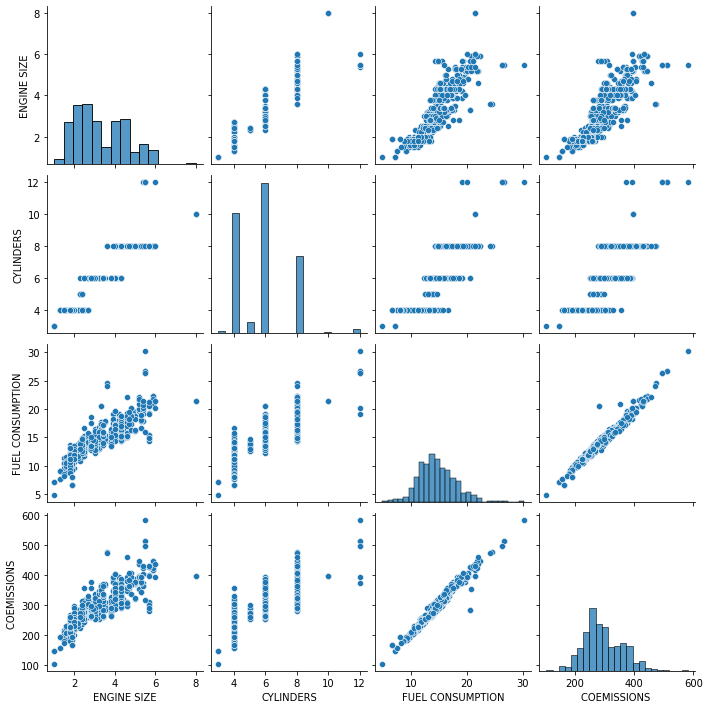

In [9]:
sns.pairplot(df[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']])
plt.savefig('.\\figures\\pairplot.png', dpi=300, bbox_inches='tight')

In [10]:
corr = df[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']].corr('spearman')

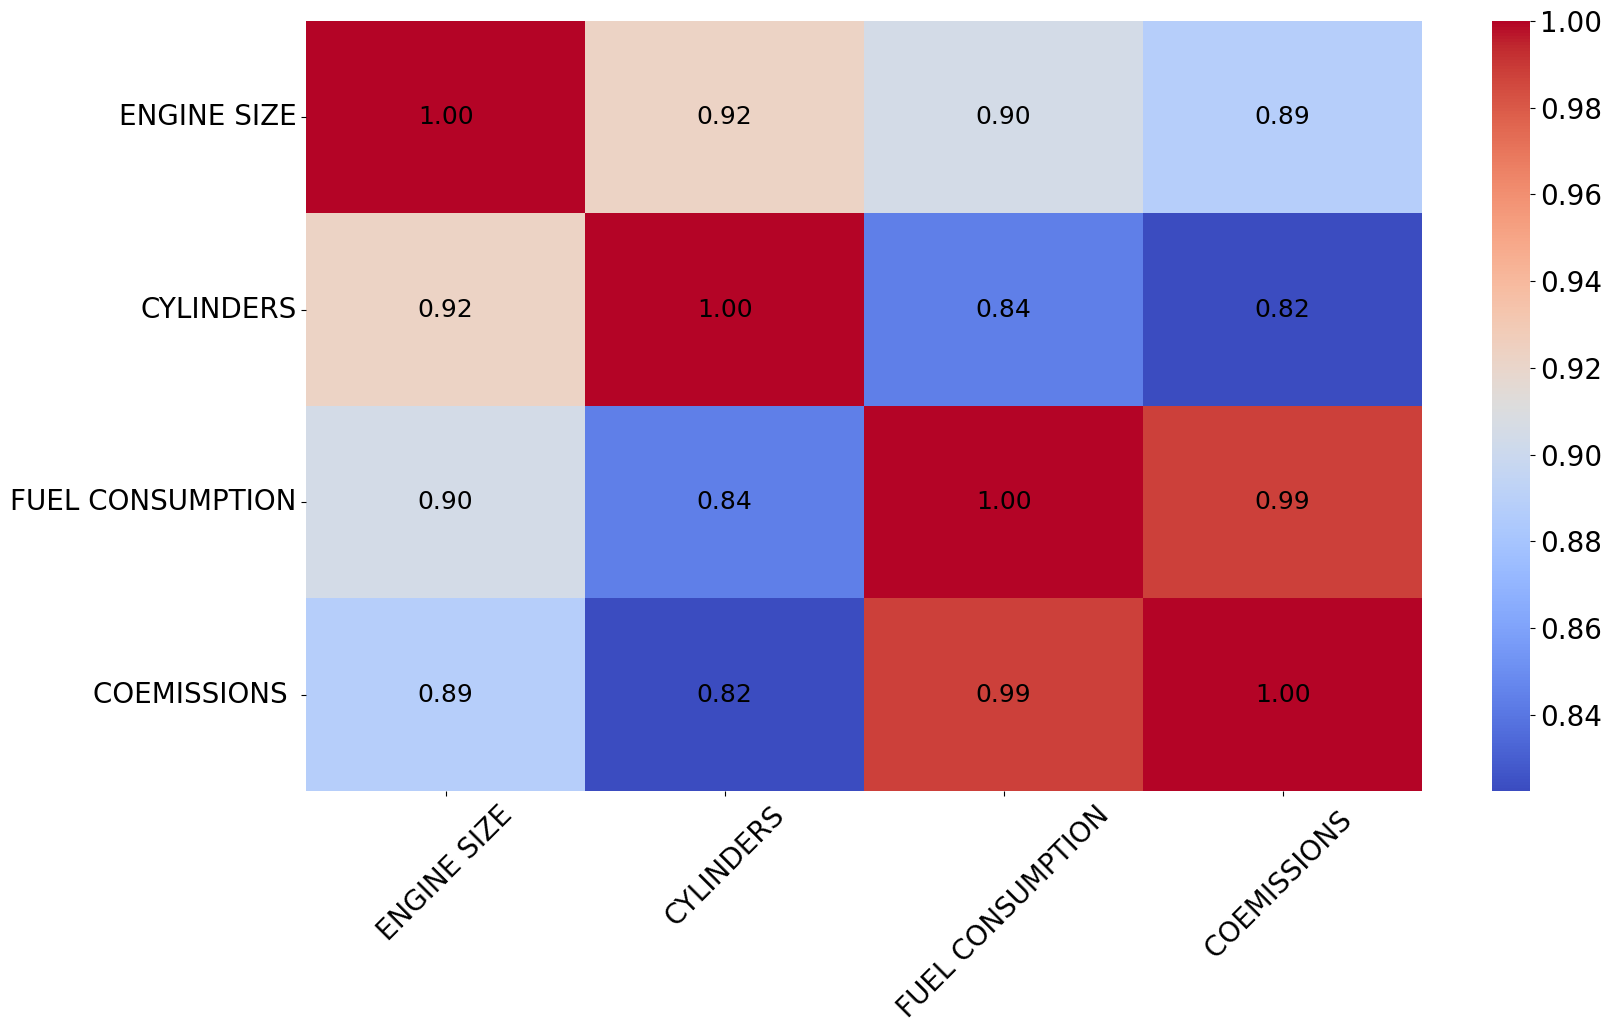

In [11]:
# Adjusting the size of the figure
plt.figure(figsize=(18,10))
# Your existing code for generating the heatmap
heatmap = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')
# Adding values to the heatmap
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j + 0.5, i + 0.5, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='black', fontsize=18)

plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=0)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)

plt.savefig('.\\figures\\heatmap.png', dpi=300, bbox_inches='tight')

# Display the heatmap
plt.show()

## 5. Splitting the data

In [12]:
X=df[['ENGINE SIZE','CYLINDERS', 'COEMISSIONS ']]
y=df[['FUEL CONSUMPTION']]

In [13]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 6. Huber Regression

### 6.1 Create the model

In [14]:
def score_estimator(y_pred , y_true):

    print(
        "MSE: %.3f"
        % mean_squared_error(
            y_true, y_pred
        )
    )
    print(
        "MAE: %.3f"
        % mean_absolute_error(
            y_true, y_pred, 
        )
    )

    # Ignore non-positive predictions, as they are invalid for
    # the Poisson deviance.
    mask = y_pred > 0
    if (~mask).any():
        n_masked, n_samples = (~mask).sum(), mask.shape[0]
        print(
            "WARNING: Estimator yields invalid, non-positive predictions "
            f" for {n_masked} samples out of {n_samples}. These predictions "
            "are ignored when computing the Poisson deviance."
        )

    print(
        "mean Poisson deviance: %.3f"
        % mean_poisson_deviance(
            y_true ,
            y_pred  
        )
    )

In [15]:
model =  HuberRegressor(alpha=0.0, epsilon=1)

### 6.2 Train Model 

In [16]:
model.fit(X_train, y_train)

HuberRegressor(alpha=0.0, epsilon=1)

## 7. Model evaluation

In [17]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

### 7.1 Evaluating the model with train data

In [28]:
print("Huber Regressor evaluation:")
score_estimator(y_train_pred, y_train)

Huber Regressor evaluation:
MSE: 0.346
MAE: 0.331
mean Poisson deviance: 0.023


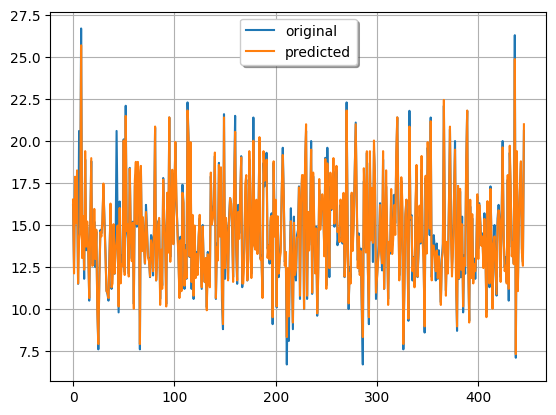

In [29]:
plt.plot(y_train.values, label="original")
plt.plot(y_train_pred, label="predicted")
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid()

### 7.2 Evaluating the model with test data

In [30]:
print("Huber Regressor evaluation:")
score_estimator(y_test_pred, y_test)

Huber Regressor evaluation:
MSE: 0.248
MAE: 0.339
mean Poisson deviance: 0.017


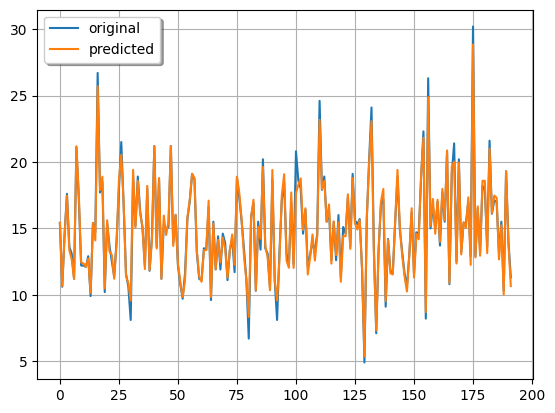

In [21]:
plt.plot(y_test.values, label="original")
plt.plot(y_test_pred, label="predicted")
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid()

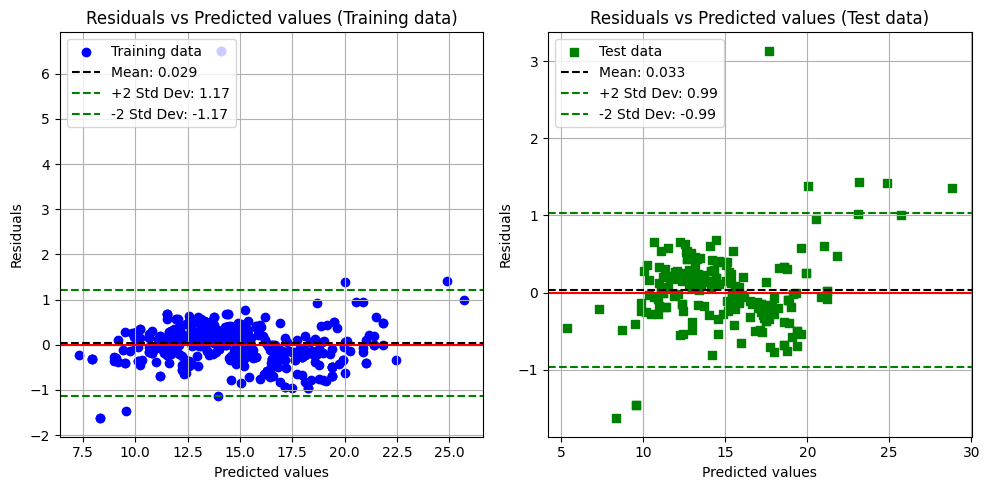

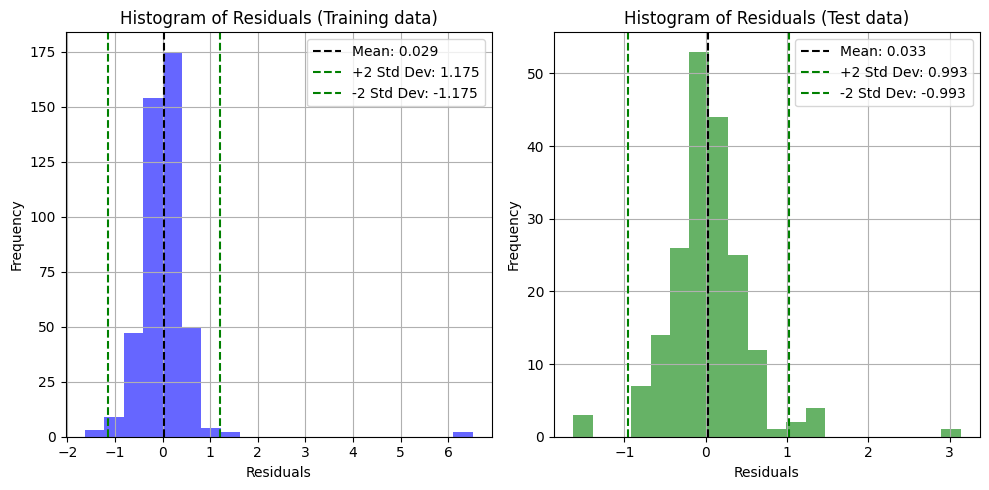

In [22]:
# Calculate residuals
train_residuals = y_train.values.reshape(1,-1).tolist()[0] - y_train_pred
# Calculate mean and standard deviation of residuals
train_residuals_mean = np.mean(train_residuals)
train_residuals_std = np.std(train_residuals)
# Calculate residuals
test_residuals = y_test.values.reshape(1,-1).tolist()[0] - y_test_pred
# Calculate mean and standard deviation of residuals
test_residuals_mean = np.mean(test_residuals)
test_residuals_std = np.std(test_residuals)

# Plot residuals
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, train_residuals, c='blue', marker='o', label=f'Training data')
plt.axhline(y=0, color='r', linestyle='-')
plt.axhline(y=train_residuals_mean, color='k', linestyle='--', label=f'Mean: {train_residuals_mean:.3f}')
plt.axhline(y=train_residuals_mean + 2 * train_residuals_std, color='g', linestyle='--', label=f'+2 Std Dev: {2*train_residuals_std:.2f}')
plt.axhline(y=train_residuals_mean - 2 * train_residuals_std, color='g', linestyle='--', label=f'-2 Std Dev: {-2*train_residuals_std:.2f}')  
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values (Training data)')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, test_residuals, c='green', marker='s', label=f'Test data')
plt.axhline(y=0, color='r', linestyle='-')
plt.axhline(y=test_residuals_mean, color='k', linestyle='--', label=f'Mean: {test_residuals_mean:.3f}')
plt.axhline(y=test_residuals_mean + 2 * test_residuals_std, color='g', linestyle='--', label=f'+2 Std Dev: {2*test_residuals_std:.2f}')
plt.axhline(y=test_residuals_mean - 2 * test_residuals_std, color='g', linestyle='--', label=f'-2 Std Dev: {-2*test_residuals_std:.2f}')  
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values (Test data)')
plt.legend(loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()



# Check for normality
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(train_residuals, bins=20, color='blue', alpha=0.6)
plt.title('Histogram of Residuals (Training data)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(x=train_residuals_mean, color='k', linestyle='--', label=f'Mean: {train_residuals_mean:.3f}')
plt.axvline(x=train_residuals_mean + 2 * train_residuals_std, color='g', linestyle='--', label=f'+2 Std Dev: {2*train_residuals_std:.3f}')
plt.axvline(x=train_residuals_mean - 2 * train_residuals_std, color='g', linestyle='--', label=f'-2 Std Dev: {-2*train_residuals_std:.3f}')  
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(test_residuals, bins=20, color='green', alpha=0.6)
plt.title('Histogram of Residuals (Test data)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(x=test_residuals_mean, color='k', linestyle='--', label=f'Mean: {test_residuals_mean:.3f}')
plt.axvline(x=test_residuals_mean + 2 * test_residuals_std, color='g', linestyle='--', label=f'+2 Std Dev: {2*test_residuals_std:.3f}')
plt.axvline(x=test_residuals_mean - 2 * test_residuals_std, color='g', linestyle='--', label=f'-2 Std Dev: {-2*test_residuals_std:.3f}')  
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

## 8. Obtaining the model to be implemented in the microcontroller

In [23]:
code = m2c.export_to_c(model)

In [24]:
print(code)

double score(double * input) {
    return 0.055454859886876616 + input[0] * 0.00900332318983459 + input[1] * 0.18410431672672556 + input[2] * 0.04558472576852831;
}



## 9. Saves the template in a .h file

In [27]:
with open('./HuberRegressor/HuberRegressor.h', 'w') as file:
    file.write(code)